# Configurando

Inicialmente precisamos importar as bibliotecas que serão utilizadas na análise.

In [0]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

E agora, iremos carregar os dataframes com as informações sobre as turmas de RPMTI nos três semestres que iremos analisar.

In [0]:
# Lendo os dataframes

rpmti_2015_2 = pd.read_csv("rpmti_2015_2.csv")
rpmti_2016_1 = pd.read_csv("rpmti_2016_1.csv")
rpmti_2016_2 = pd.read_csv("rpmti_2016_2.csv")

# Gerando os gráficos

Nessa sessão iremos gerar os graficos para as análises sobre as turmas.

## Situação dos discentes em 2015.2

Gráfico para representar a situação dos alunos em 2015.2, por turma.

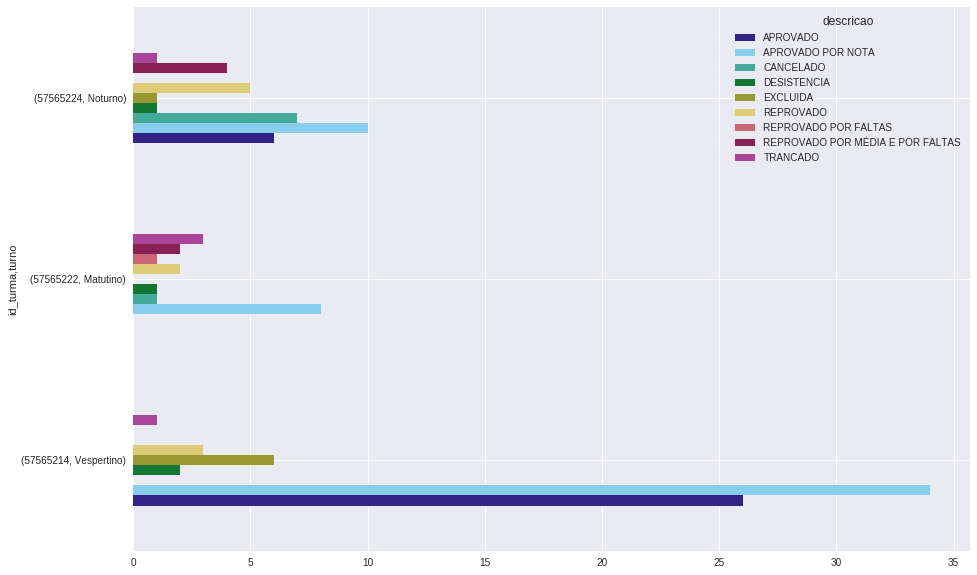

In [36]:
# Paleta com 9 cores amigáveis para daltônicos
paleta_9 = [
    '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677',
    '#882255', '#AA4499'
]

# Agrupando por turma e turno
turma_2015_2 = rpmti_2015_2.groupby(['id_turma','turno', 'descricao']).size()
turma_2015_2 = turma_2015_2.unstack()

# Gerando gráfico de barras
turma_2015_2.plot(kind='barh', figsize=(15, 10), color=paleta_9)

**ESCREVER ANÁLISE**

## Situação dos discentes em 2016.1

Gráfico para representar a situação dos alunos em 2016.1, por turma.

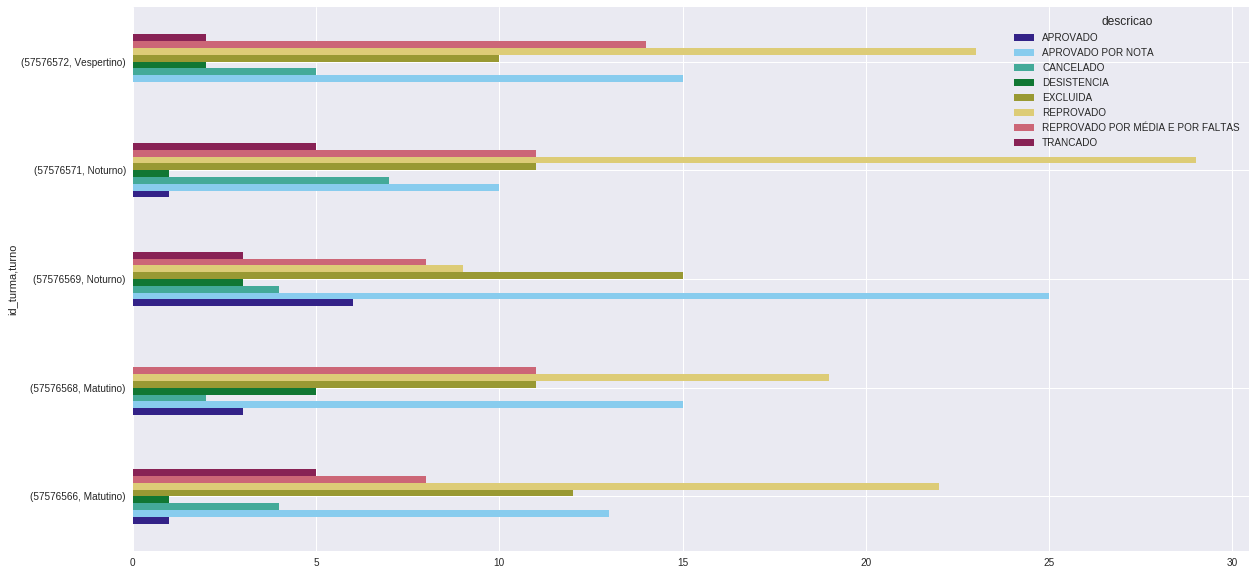

In [38]:
# Agrupando por turma e turno
turma_2016_1 = rpmti_2016_1.groupby(['id_turma','turno', 'descricao']).size()
turma_2016_1 = turma_2016_1.unstack()

# Gerando gráfico de barras
turma_2016_1.plot(kind='barh', figsize=(20, 10), color=paleta_9)

**ESCREVER ANÁLISE**

## Situação dos discentes em 2016.2

Gráfico para representar a situação dos alunos em 2016.2, por turma.

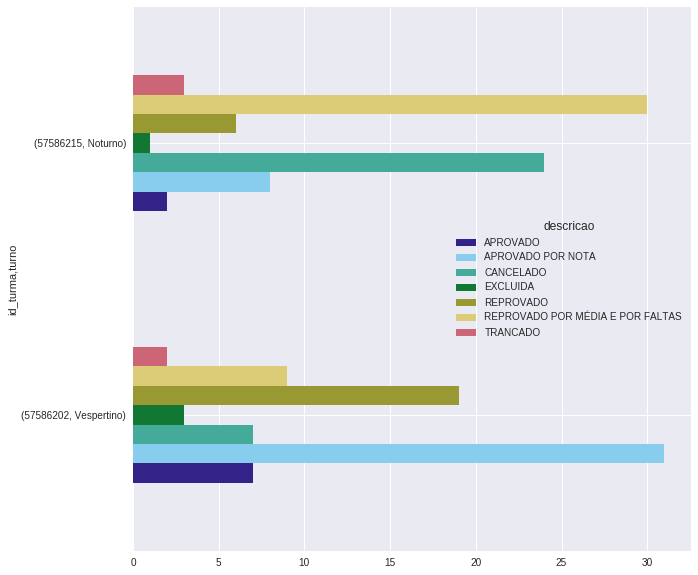

In [41]:
# Agrupando por turma e turno
turma_2016_2 = rpmti_2016_2.groupby(['id_turma','turno', 'descricao']).size()
turma_2016_2 = turma_2016_2.unstack()

# Gerando gráfico de barras
turma_2016_2.plot(kind='barh', figsize=(10, 10), color=paleta_9)

**ESCREVER ANÁLISE**

## Média dos discentes em 2015.2

Média dos alunos referentes as turmas ofertadas nos semestres de 2015.2.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


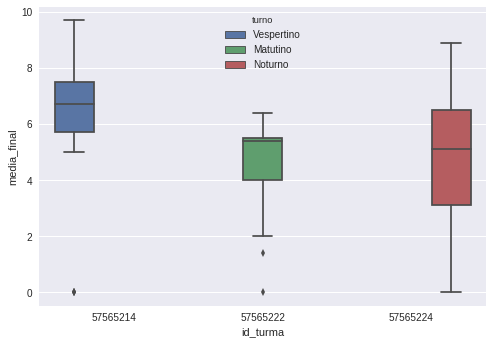

In [61]:
ax = sns.boxplot(x="id_turma", y="media_final", hue="turno", data=rpmti_2015_2)

**ESCREVER ANÁLISE**

## Média dos discentes em 2016.1

Média dos alunos referentes as turmas ofertadas nos semestres de 2016.1.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


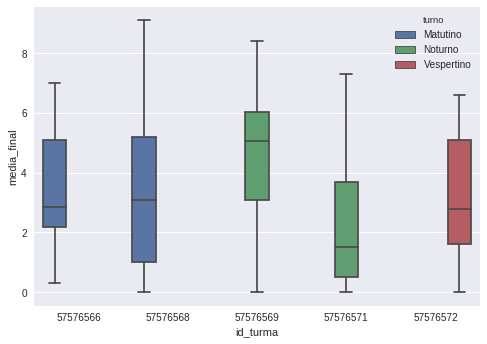

In [59]:
ax = sns.boxplot(x="id_turma", y="media_final", hue="turno", data=rpmti_2016_1)

**ESCREVER ANÁLISE**

## Média dos discentes em 2016.2

Média dos alunos referentes as turmas ofertadas nos semestres de 2016.2.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


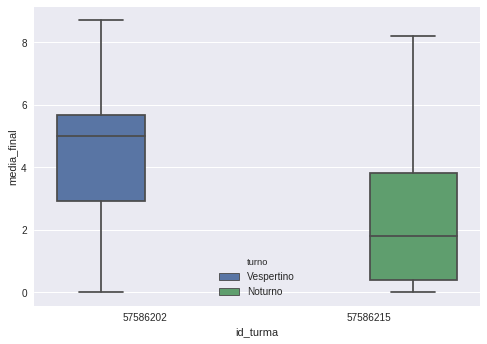

In [60]:
ax = sns.boxplot(x="id_turma", y="media_final", hue="turno", data=rpmti_2016_2)

**ESCREVER ANÁLISE**

## Segunda chance: reprovados em 2015.2 que tentaram em 2016.1

O propósito dessa seção é analisar os alunos que não obtiveram sucesso no semestre de 2015.2 e ingressaram novamente em alguma turma de 2016.1. 

Para isso, iremos pegar a intercessão dos discentes entre os datasets desses dois semestres.

In [113]:
second_chance = pd.merge(rpmti_2015_2, rpmti_2016_1, how='inner', on=['discente'])
second_chance.shape[0]

10

Temos então um total de 10 alunos nessa situação. Vamos agora gerar gráficos para verificar a situação desses 10 alunos entre um semestre e outro.

In [127]:
turma_151 = second_chance["situacao_x"]
turma_151

KeyError: ignored

Text(0.5,0,'Situação dos alunos')

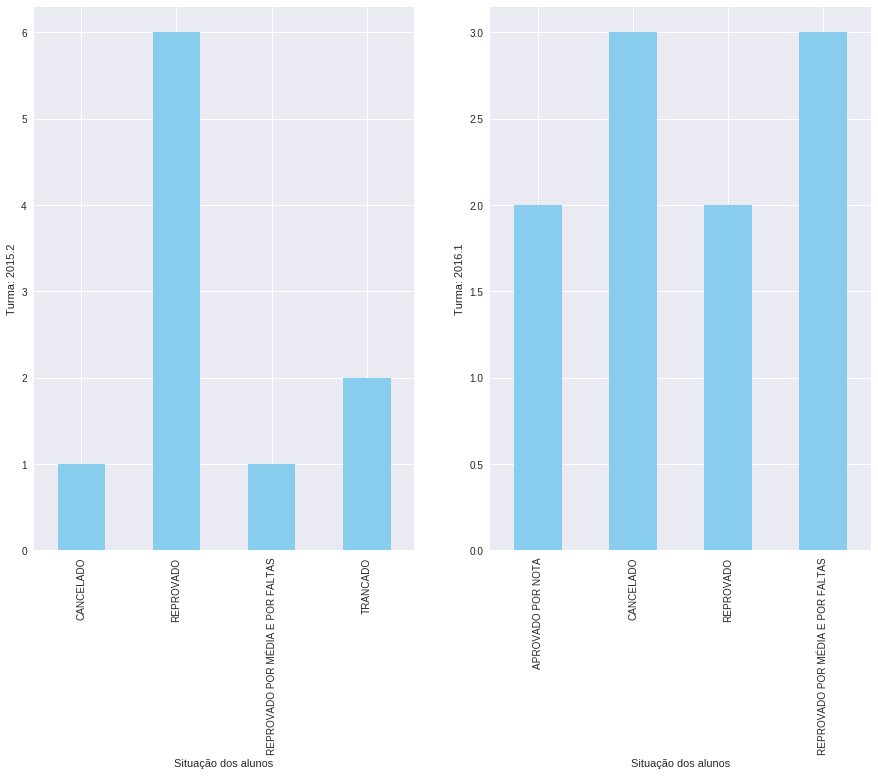

In [119]:
# Criando uma figura para exibir dois gráficos
plt.figure()
f, axes = plt.subplots(1, 2)

# Separando por turmas


# Chaves para organizar todas as barras igualmente
situacoes = ['CANCELADO', 'TRANCADO', 'REPROVADO',
             'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA']
mapping = {situacao: i for i, situacao in enumerate(situacoes)}
key_1 = ['day'].map(mapping)

turma_151.plot(kind="bar", ax=axes[0], figsize=(15,10), color="#88CCEE")
axes[0].set_ylabel('Turma: 2015.2')
axes[0].set_xlabel('Situação dos alunos')

turma_161.plot(kind="bar", ax=axes[1], figsize=(15,10), color="#88CCEE")
axes[1].set_ylabel('Turma: 2016.1')
axes[1].set_xlabel('Situação dos alunos')

**ESCREVER ANÁLISE: LEMBRE DE OLHAR QUE OS GRÁFICOS ESTÃO COM ESCALAS DIFERENTES, ENTÃO OS VALORES SÃO DIFERENTES. PERCEBA TAMBÉM QUE EXISTE INFORMAÇÃO QUE TEM EM UMA TURMA QUE NÃO TEM EM OUTRA (EXEMPLO DE TRANCADO) E QUE A ORDEM DAS TABELAS ESTÁ DIFERENTE EM CADA UM**